# Introducción a PyTorch


***

Esto simplemente es para que las gráficas se vean dentro del archivo.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1.- ¿Por donde empezamos?


Importando las librerias necesarias

In [2]:
from __future__ import print_function
import torch

El elemento principal será el concepto de **tensor** que lo podemos pensar como un arreglo multidimensional.

Construimos una matriz vacía 5x3

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[5.0782e+31, 4.2964e+24, 1.7753e+28],
        [1.3458e-14, 1.4585e-19, 9.3233e-09],
        [1.1703e-19, 1.5637e-01, 1.3000e+34],
        [1.7592e+22, 4.1223e+21, 1.7974e+19],
        [1.4585e-19, 6.7421e+22, 5.0761e+31]])


Construimos una matriz aleatorioa 5x3


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9588, 0.9869, 0.5743],
        [0.6178, 0.3496, 0.2591],
        [0.9010, 0.2621, 0.6906],
        [0.5249, 0.5369, 0.7292],
        [0.1288, 0.4366, 0.4449]])


Construimos una matriz llena de ceros con elementos tipo entero de 64 bits



In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construir un tensor a partir de información


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


o crear un tensor basado en un tensor existente. Estos métodos
reutilizan las propiedades del tensor original, e.g. dtype, etc.
Se pueden cambiar si se requiere.


In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # Creamos un tensor de tamaño 5x3
print(x)

x = torch.randn_like(x, dtype=torch.float)    # sobreescribimos dtype!
print(x)                                      # tiene el mismo tamaño que el original.

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.8441, -0.1613,  1.3354],
        [-2.1559, -0.2797, -0.2001],
        [-0.2796,  0.8851,  0.5842],
        [ 0.5092, -1.2767,  1.7723],
        [-0.4582, -0.0246,  0.2916]])


Para saber su tamaño (en general)



In [8]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` es un tupla, por lo tanto, soporta sus operaciones.</p></div>


### Operaciones


Los tensores típicamente soportan dos tipos de operaciones:

* In situ: Afecta al tensor sobre el cual son llamadas. **Siempre tienen un _ al final de su nombre**
* No in situ: Producen un nuevo tensor.

Hay varias formas de la escritura de operaciones.

Por ejemplo, 

#### Suma

* Escritura 1

In [9]:
y = torch.rand(5, 3)
print(y)
print(x + y) # NUEVO TENSOR

tensor([[0.6910, 0.2660, 0.8864],
        [0.6342, 0.8031, 0.4348],
        [0.7052, 0.1312, 0.2854],
        [0.8973, 0.3373, 0.2291],
        [0.0682, 0.2181, 0.9803]])
tensor([[ 1.5352,  0.1047,  2.2217],
        [-1.5217,  0.5234,  0.2347],
        [ 0.4256,  1.0163,  0.8696],
        [ 1.4065, -0.9394,  2.0014],
        [-0.3900,  0.1935,  1.2719]])


* Escritura 2


In [10]:
print(torch.add(x, y)) # NUEVO TENSOR SIN MODIFICAR A X Y Y
print(y)

tensor([[ 1.5352,  0.1047,  2.2217],
        [-1.5217,  0.5234,  0.2347],
        [ 0.4256,  1.0163,  0.8696],
        [ 1.4065, -0.9394,  2.0014],
        [-0.3900,  0.1935,  1.2719]])
tensor([[0.6910, 0.2660, 0.8864],
        [0.6342, 0.8031, 0.4348],
        [0.7052, 0.1312, 0.2854],
        [0.8973, 0.3373, 0.2291],
        [0.0682, 0.2181, 0.9803]])


La suma tiene como argumento el tensor de salida.


In [11]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.5352,  0.1047,  2.2217],
        [-1.5217,  0.5234,  0.2347],
        [ 0.4256,  1.0163,  0.8696],
        [ 1.4065, -0.9394,  2.0014],
        [-0.3900,  0.1935,  1.2719]])


<div class="alert alert-info"><h4>Note</h4><p>Recordemos que en Python todo son clases y métodos</p></div>
*Escritura 3

In [12]:
y.add_(x)
print(y)

tensor([[ 1.5352,  0.1047,  2.2217],
        [-1.5217,  0.5234,  0.2347],
        [ 0.4256,  1.0163,  0.8696],
        [ 1.4065, -0.9394,  2.0014],
        [-0.3900,  0.1935,  1.2719]])


<div class="alert alert-info"><h4>Note</h4><p>Este tipo de operaciones cambian ''y''.
    Por ejemplo: ``y.copy_(x)``, ``y.t_()`.</p></div>

Podemos usar el sistema de indexación estándar como en Numpy (iniciamos con 0, como la gente decente).


In [13]:
print(x)

tensor([[ 0.8441, -0.1613,  1.3354],
        [-2.1559, -0.2797, -0.2001],
        [-0.2796,  0.8851,  0.5842],
        [ 0.5092, -1.2767,  1.7723],
        [-0.4582, -0.0246,  0.2916]])


In [14]:
print(x[:, 1])

tensor([-0.1613, -0.2797,  0.8851, -1.2767, -0.0246])


Podemos cambiar el tamaño y forma del tensor con ``torch.view``. Sin embargo, debemos pensarlo como vistas del tensor y no como copias del tensor que ocuparían memoria.


In [15]:
x = torch.randn(4, 4) # Tensor con una distribución normal, en lugar de una uniforme con rand
print(x,"\n")
y = x.view(16) # Vemos al tensor como un tensor (1,16)
print(y,"\n")
z = x.view(-1, 8)  # El valor de -1 se deducirá de las otras dimensiones
print(z,"\n")
r = x.view(-1,4)
print(r,"\n")
w = x.view(2,2,4) # Se divide en "2" de dimensiones 2x4
print(w,"\n")
print(x.size(), y.size(), z.size(), r.size(), w.size())

tensor([[ 0.1868, -1.6808,  0.6165, -0.1443],
        [ 0.7881, -0.5540, -0.2496, -1.6792],
        [-0.8590, -0.4799, -0.6260,  0.6637],
        [ 1.0207, -0.2112, -1.6405,  0.6218]]) 

tensor([ 0.1868, -1.6808,  0.6165, -0.1443,  0.7881, -0.5540, -0.2496, -1.6792,
        -0.8590, -0.4799, -0.6260,  0.6637,  1.0207, -0.2112, -1.6405,  0.6218]) 

tensor([[ 0.1868, -1.6808,  0.6165, -0.1443,  0.7881, -0.5540, -0.2496, -1.6792],
        [-0.8590, -0.4799, -0.6260,  0.6637,  1.0207, -0.2112, -1.6405,  0.6218]]) 

tensor([[ 0.1868, -1.6808,  0.6165, -0.1443],
        [ 0.7881, -0.5540, -0.2496, -1.6792],
        [-0.8590, -0.4799, -0.6260,  0.6637],
        [ 1.0207, -0.2112, -1.6405,  0.6218]]) 

tensor([[[ 0.1868, -1.6808,  0.6165, -0.1443],
         [ 0.7881, -0.5540, -0.2496, -1.6792]],

        [[-0.8590, -0.4799, -0.6260,  0.6637],
         [ 1.0207, -0.2112, -1.6405,  0.6218]]]) 

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([4, 4]) torch.Size([2, 2, 4])


Si tenemos un tensor de un elemento, usando ``.item()`` para
obtener el valor como un número de Python.


In [16]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.9899])
-1.9899187088012695


**Lo que no se dijo:**

  100+ operaciones de tensores tales como: transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.
  [Aquí](https://pytorch.org/docs/torch) más info 
  
### Conexión con NumPy 


Podemos convertir entre tensores de PyTorch a un array de Numpy.

Los dos objetos compartirán la localización en la memoria.

**Conviertiendo tensores a arrays**

In [17]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [18]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Veamos como se modifican los valores en el array


In [19]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


**Converting NumPy Array to Torch Tensor**

Veamos como cambiando el array cambia el tensor automáticamente.

In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


***
## 2.- Ejemplo de Red Neuronal Artificial (RNA)

Usaremos el viejo conocido ejemplo [MNIST](https://en.wikipedia.org/wiki/MNIST_database), que contiene
imágenes de números manuscritos del 0-9

**Carga de la base de dato (dataset)**

In [21]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Para usar el dataset se debe transforma en un tensor de Pytorch, definimos la transfomración *transform* que usaremos en el proceso de carga.

Definimos un *DataLoader*, un objeto [generador de Python](https://wiki.python.org/moin/Generators) cuyo comentido es proporcionar las imágenes en grupos de *batch_size*.

Separamos al dataset en dos, un conjunto de entrenamiento y otro de prueba.

In [22]:
#clase de torchvision que concatena transformaciones en este caso ToTensor(es obvio) y Normalize(Normaliza un tensor de imagen a una media y desviación )
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))])
# descargamos el dataset MNIST, lo marcamos como entrenador y aplicamos las transformaciones
train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
# Generamos un iterador de Torch que suporta todas las operaciones de la libreria.
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True) 
#batch_size cuantas muestras por lote serán cargadas (default = 1)

test_set = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Iteramos sobre el conjunto de entrenamiento y visualizamos un muestra

In [23]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

Ahora veamos como se ve una muestra

In [24]:
print(images[1].numpy().squeeze()) #squeeze elimina todas las dimensiones de tamaño 1 

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [25]:
print(labels[1])

tensor(3)


Veamos la imagen de muestra

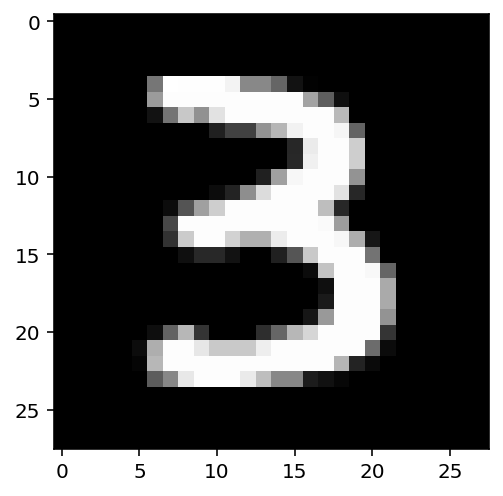

In [26]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

**Definición de la topología de la RNA**

Hay muchas formas de construir una red neuronal en Pytorch, pero ¿qué es una red neuronal artificial? **Ver presentación.**

Definimos como se compone la capa de entrada, las intermedias (u ocultas) y una de salida.

El número de capas ocultas, así como el número de neuronas en ellas, depende de la complejidad y el tipo de problema.

Usaremos 2 capas ocultas con 128 y 64 neuronas, respectivamente.

Importamos nn.Module 

In [27]:
class Network(nn.Module):        #Heredamos de la clase nn.Module (vainilla network) los atributos para nuestra Network
    def __init__(self):          #Esto define al constructor de la clase
        super().__init__()
        self.fully_connected_1 = nn.Linear(784, 128)
        self.fully_connected_2 = nn.Linear(128, 64)
        self.fully_connected_3 = nn.Linear(64, 10)
        
    def forward(self, x):        #define el orden y las funciones de activación
        x = self.fully_connected_1(x)
        x = F.relu(x)
        x = self.fully_connected_2(x)
        x = F.relu(x)
        x = self.fully_connected_3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (fully_connected_3): Linear(in_features=64, out_features=10, bias=True)
)

**La capa de entrada** 

Tiene tantas neuronas como datos contiene nuestra muestra. Es decir, las entradas son 28x28 píxeles mostrados los números manuscritos. Por lo tanto, nuestra capa de entrada consta de 28x28 neuronas.

**La capa de salida**

Tiene tantas posibles salidas como clases hay en nuestros datos, 10 en este caso los dígitos del 0 al 9.

**La función de activación**

Es la función de define la salida de un nodo en función de una entrada o conjunto de entradas. 
Usaremos [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (Rectified Linear Unit) y
[Softmax](https://en.wikipedia.org/wiki/Softmax_function)


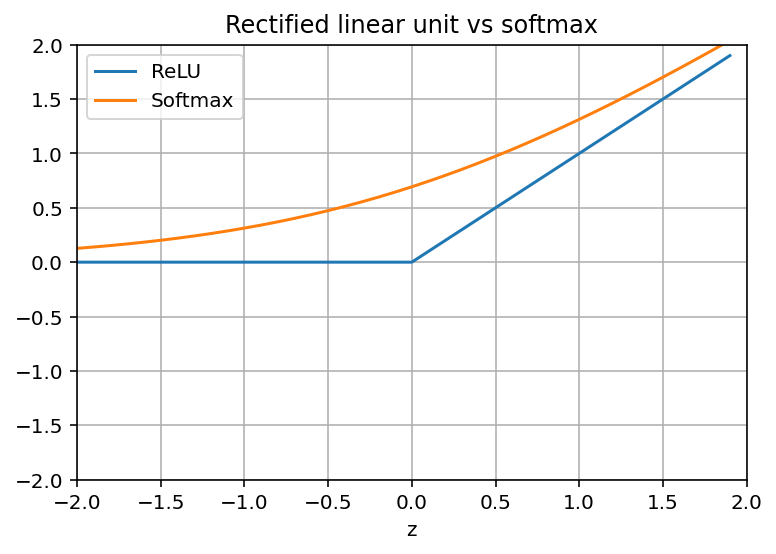

In [28]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y,label="ReLU")
ax.plot(z,np.log(1+np.exp(z)),label="Softmax")
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.legend()
ax.set_xlabel('z')
ax.set_title('Rectified linear unit vs softmax')

plt.show()

**Función de propagación "Forward"**

Define el orden en que se realizan los cálculos desde el input, a través de las hidden layers hasta el output, utilizando la función de activación.


En nuestro ejemplo, iniciamos con un tensor bidimensional 28x28 a uno unidimensional de 784 valores, que se le pasan a la capa de entrada, con la función *view*.

**Inicializando los pesos y *biases***

Ambos son iniciados automáticamente, pero podemos sobreescribirlos si queremos.

Éstos son tensores almacenados como miembros de cada capa.

In [29]:
print(model.fully_connected_1.weight)
print(model.fully_connected_1.bias)

Parameter containing:
tensor([[-0.0267, -0.0304, -0.0218,  ...,  0.0213, -0.0125,  0.0101],
        [-0.0086, -0.0185,  0.0311,  ..., -0.0175, -0.0156, -0.0022],
        [-0.0159, -0.0232,  0.0083,  ..., -0.0037, -0.0008, -0.0261],
        ...,
        [ 0.0029, -0.0019, -0.0091,  ..., -0.0061,  0.0061,  0.0187],
        [-0.0299, -0.0173, -0.0192,  ..., -0.0073, -0.0192,  0.0241],
        [ 0.0260, -0.0031,  0.0343,  ..., -0.0073, -0.0256, -0.0084]],
       requires_grad=True)
Parameter containing:
tensor([-0.0111,  0.0331,  0.0240,  0.0250,  0.0014, -0.0323,  0.0274, -0.0022,
        -0.0192, -0.0134, -0.0178,  0.0178, -0.0194, -0.0150,  0.0323, -0.0213,
        -0.0226, -0.0031, -0.0258, -0.0010, -0.0059, -0.0207,  0.0125,  0.0345,
        -0.0075,  0.0085,  0.0288,  0.0027, -0.0078,  0.0118,  0.0322,  0.0177,
         0.0171, -0.0243, -0.0340,  0.0311, -0.0252, -0.0048, -0.0332, -0.0028,
        -0.0207,  0.0184,  0.0102,  0.0297, -0.0294, -0.0034, -0.0291,  0.0181,
         0.0055

Para modificar estos tensores podemos usar operaciones in situ.

In [30]:
# Set biases to all 0s
model.fully_connected_1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# Sample from random normal
model.fully_connected_1.weight.data.normal_(std=0.01)

tensor([[ 0.0130,  0.0045,  0.0185,  ...,  0.0094, -0.0015,  0.0007],
        [ 0.0029, -0.0087,  0.0071,  ...,  0.0159,  0.0142, -0.0121],
        [-0.0110, -0.0064, -0.0015,  ..., -0.0002,  0.0135,  0.0229],
        ...,
        [-0.0024, -0.0162, -0.0149,  ...,  0.0065,  0.0085,  0.0007],
        [-0.0180,  0.0214,  0.0070,  ...,  0.0026,  0.0066, -0.0060],
        [-0.0107,  0.0025, -0.0079,  ..., -0.0024, -0.0024,  0.0034]])

**Seguimiento**

Pasemosle una imagen a la red, para eso debemos convertirla en tensor para luego aplicarle el método *Foward*

<class 'torch.Tensor'>


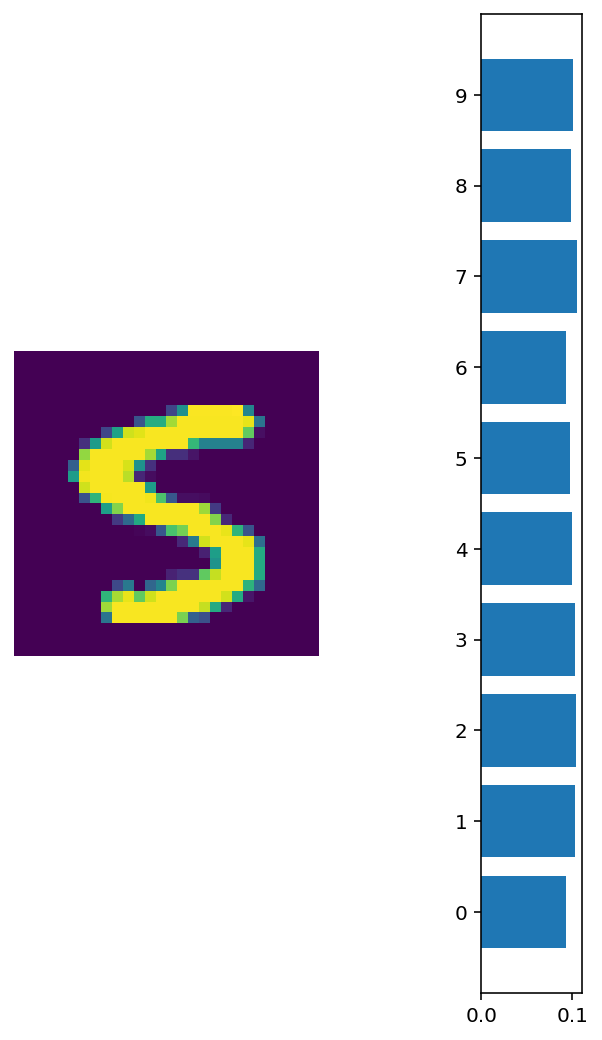

In [32]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(type(images))
images.resize_(64, 1, 784) 

image_index = 0
ps = model.forward(images[image_index, :])

image = images[image_index]
utils.view_classify(image.view(1, 28, 28), ps)

La red es bastante tonta, pero es normal falta entrenarla.

**Otra manera de construir redes**

También podemos definir una redes con un paradigma funcional. Básicamente, estamos definido la red
como una lista de capas u operaciones por las cuales el tensor de entrada deberá pasar en secuencia

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


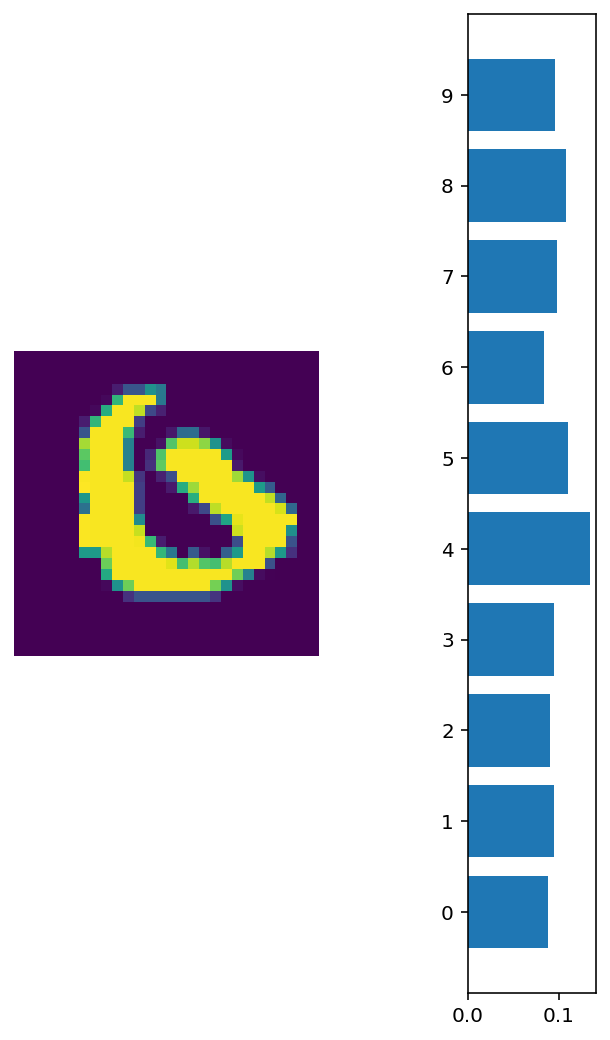

In [33]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

El problema de esta manera de crear una red neuronal es que terminamos con índices en vez de nombres asociados a cada operación. Podemos solucionar esto pasándole un `OrderedDict` será un par de la forma (_nombre de la operación_, _operación_)

In [34]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('output', nn.Linear(hidden_sizes[1], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Por diversión, creemos una red más compleja.

In [35]:
input_size = 784
layer_sizes = [400, 200, 100]
output_size = 10

model = model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, layer_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(layer_sizes[0], layer_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('fully_connected_3', nn.Linear(layer_sizes[1], layer_sizes[2])),
             ('relu_3', nn.ReLU()),
             ('output', nn.Linear(layer_sizes[2], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=400, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=400, out_features=200, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=200, out_features=100, bias=True)
  (relu_3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

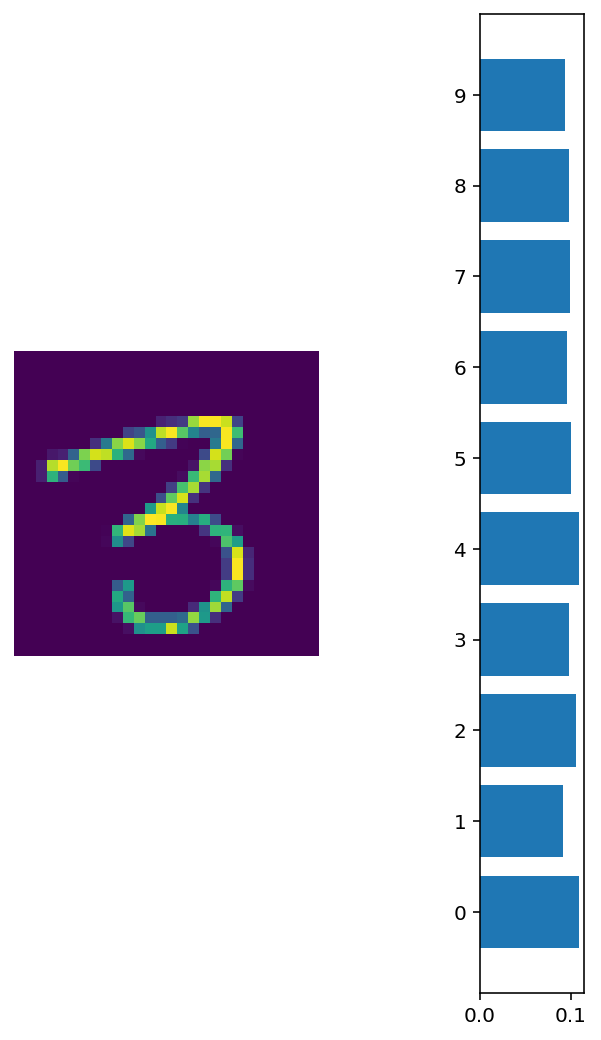

In [36]:
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

## 3.- Entrenando a la red

Una parte importante del proceso del Deep Learning es el entrenamiento de las redes, ya que de ello depende
el rendimiento en las tareas que le encomendemos.

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) es un algoritmo para disminuir la función 
de pérdida o error a medida que nos adentramos en el entrenamiento. Durante el entrenamiento de cualquier
modelos de ML buscamos optimizar el error entre las predicciones y los datos reales.


**Autograd** 

[Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) es un módulo de Pytorch para calcular el gradiente de las operaciones sobre los tensores. Permite un registro de las operaciones ejecutadas sobre ellos, le podemos indicar a Pytorch que lleve el control de los gradientes de varias maneras:
- Al momento de crear un tensor: `mi_tensor = torch.ones(10, requieres_grad=True)`
- In situ: `mi_tensor.requieres_grad_(True)`

### Inicio

Importaremos todo lo necesario

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict #dict subclass that remembers the order entries were added

import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

In [115]:
x = torch.tensor([[1., 2.],[3.,4.]], requires_grad=True)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [116]:
y = x ** 2
print(y)

tensor([[ 1.,  4.],
        [ 9., 16.]], grad_fn=<PowBackward0>)


En la celda de abajo podemos ver la función de derivación (gradiente) que Autograd creó para la operación de potenciación al cuadrado que especificamos anteriormente.

In [117]:
# Mostrar la función generada por la operación potencia.
print(y.grad_fn)

Calculemos la media de este tensor y, seguidamente, computemos su gradiente con el método `backward()`.

In [118]:
z = y.mean()
print(z)

tensor(7.5000, grad_fn=<MeanBackward0>)


In [120]:
z.backward() # Backward se aplica al final del proceso y sobre un escalar
print(x.grad) # 2x potencia y 1/4 promedio
print(x / 2) 

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]], grad_fn=<DivBackward0>)


Estos cálculos de gradiente son la clave para que las redes neuronales aprendan, dado que *backpropagation* requiere que el error se progague de las últimas hacia las primeras capas del modelo.

### Obteniendo los datos

Obtenemos el conjunto de los datos MNIST, los convertimos a tensores y normalizamos.

In [43]:
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5)),])
train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

### Arquitectura 

Definimos la red neuronal, no activaremos las salidas de esta red. En cambio, produciremos *logits* `aclaración: logits puede significar varias cosas: Math es un de probabilidades L:[0,1] ->(-inf,inf); en ML un vector con entradas "crudas" de las predicciones en un problema de clasificación; a veces se comprenden como el elemento inverso de la función sigmoid` puros porque directamente los resultados de una función *softmax*, la cual genera una distribución de probabilidad sobre las etiquetas, conduce a problemas de inestabilidad numérica ya que los valores están demasiado cerca de 1 o 0.

In [44]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
            ('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu_1', nn.ReLU()),
            ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu_2', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[1], output_size))
        ]))

### Entrenando la red

Para entrenar la red necesitamos la función de pérdida (comúnmente referida como el *criterio* o, en inglés, *criterion*).

**Función de perdida**

Usamos una función para optimizar los parámetros durante el entrenamiento. Hay muchas funciones
de pérdida disponibles en PyTorch, usaremos [CrossEntropy](https://en.wikipedia.org/wiki/Cross_entropy) recomendada en situaciones de *clasificación multiclase* y porque estamos implementando una salida *softmax*.

**Optimizador**

Es el objeto que recibe los parámetros del modelo y la tasa de aprendizaje, y se encarga de ajustar los parámetros en función del gradiente de la función de pérdida de forma iteractiva durante el entrenamiento de
la red. Utilizamos un algoritmo [SGD](https://pytorch.org/cppdocs/api/classtorch_1_1optim_1_1_s_g_d.html#exhale-class-classtorch-1-1optim-1-1-s-g-d).

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

Hacemos un entrenamiento en un solo paso, primero hacemos un paso con el `forward()` sobre el modelo.
Después, se calcula el error usando `criterion`. Para ello, le pasamos las etiquetas reales y las salidas de la red. Luego retroalimentamos con el error con `backward()`. Finalmente, actualizamos los parámetros llamando al método `step()` sobre el optimizador.

In [46]:
print(f'Initial weights - {model.fully_connected_1.weight}')

images, labels = next(iter(train_loader))
images.resize_(64, 784)

optimizer.zero_grad() # Reiniciamos los gradientes


output = model.forward(images) # Forward pass, then backward, then update
loss = criterion(output, labels)
loss.backward()
print(f'Gradient - {model.fully_connected_1.weight.grad}')
optimizer.step()

Initial weights - Parameter containing:
tensor([[ 0.0311,  0.0274, -0.0355,  ...,  0.0155,  0.0262, -0.0200],
        [-0.0135, -0.0215, -0.0341,  ..., -0.0107,  0.0200, -0.0003],
        [ 0.0233,  0.0212, -0.0153,  ..., -0.0228, -0.0029, -0.0038],
        ...,
        [-0.0255,  0.0242, -0.0342,  ..., -0.0309,  0.0139,  0.0177],
        [-0.0010, -0.0269, -0.0101,  ..., -0.0335,  0.0350, -0.0057],
        [ 0.0253,  0.0212,  0.0056,  ...,  0.0197, -0.0020, -0.0165]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


In [47]:
print(f'Updated weights - {model.fully_connected_1.weight}')

Updated weights - Parameter containing:
tensor([[ 0.0311,  0.0274, -0.0355,  ...,  0.0155,  0.0262, -0.0200],
        [-0.0135, -0.0215, -0.0341,  ..., -0.0107,  0.0200, -0.0003],
        [ 0.0232,  0.0212, -0.0154,  ..., -0.0229, -0.0029, -0.0038],
        ...,
        [-0.0255,  0.0242, -0.0342,  ..., -0.0309,  0.0139,  0.0177],
        [-0.0010, -0.0269, -0.0100,  ..., -0.0335,  0.0350, -0.0057],
        [ 0.0253,  0.0212,  0.0056,  ...,  0.0197, -0.0020, -0.0165]],
       requires_grad=True)


Para entrenar en serio, sólo debemos repetir el paso anterior para cada lote de datos, durante cada epoch

In [48]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [49]:
epochs = 3
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(train_loader):
        steps += 1
        
        images.resize_(images.size()[0], 784) #aplanamos
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'Epoch: {epoch + 1}/{epochs}...\nLoss: {running_loss/print_every}')
            
            running_loss = 0


Epoch: 1/3...
Loss: 2.2886983692646026
Epoch: 1/3...
Loss: 2.2606583654880525
Epoch: 1/3...
Loss: 2.2377219080924986
Epoch: 1/3...
Loss: 2.212178409099579
Epoch: 1/3...
Loss: 2.187507063150406
Epoch: 1/3...
Loss: 2.160758352279663
Epoch: 1/3...
Loss: 2.1313899993896483
Epoch: 1/3...
Loss: 2.0919652760028837
Epoch: 1/3...
Loss: 2.0563848584890367
Epoch: 1/3...
Loss: 2.021127533912659
Epoch: 1/3...
Loss: 1.972404795885086
Epoch: 1/3...
Loss: 1.9352718740701675
Epoch: 1/3...
Loss: 1.8809599995613098
Epoch: 1/3...
Loss: 1.8314914971590042
Epoch: 1/3...
Loss: 1.7757493197917937
Epoch: 1/3...
Loss: 1.708385619521141
Epoch: 1/3...
Loss: 1.6440695136785508
Epoch: 1/3...
Loss: 1.5869228661060333
Epoch: 1/3...
Loss: 1.5281584292650223
Epoch: 1/3...
Loss: 1.4754641592502593
Epoch: 1/3...
Loss: 1.378334140777588
Epoch: 1/3...
Loss: 1.3411946415901184
Epoch: 1/3...
Loss: 1.3000631302595138
Epoch: 2/3...
Loss: 0.6797632098197937
Epoch: 2/3...
Loss: 1.1924261689186095
Epoch: 2/3...
Loss: 1.1301191300

**Resultados**

Vemos la dinámica de la función de pérdida y las interacciones.

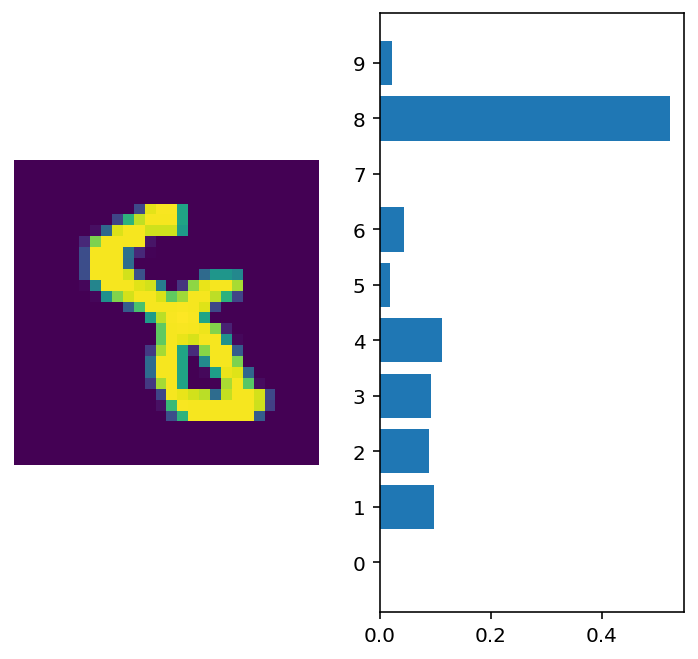

In [50]:
images, labels = next(iter(train_loader))

image = images[2].view(1, 784)

# Apagamos lo gradientes porque es una prueba
with torch.no_grad():
    logits = model.forward(image)
    
predictions = F.softmax(logits, dim=1)
utils.view_classify(image.view(1, 28, 28), predictions)

Se puede observar la disminución del error de clasificación a medida que se ha ido entrenando la RNA.

## 4.- Un problema más difícil: Fashion-MNIST

MNIST ha estado rondando por ahí durante bastante tiempo y ha llegado al punto en el que resolver el problema que presenta se ha vuelvo trivial y, por tanto, no provee un buen punto de referencia para muchos algoritmos modernos de Machine y Deep Learning.

Fashion-MNIST, por su parte, pretende reemplazar al MNIST tradicional como el dataset por defecto para medir la efectividad de los modelos de Deep Learning. Es más complejo puesto que sus imágenes representan diversas prendas de ropa, en vez de dígitos escritos a mano.

Como sucede con el MNIST original, cada imagen tiene una resolución de 28x28 y se encuentra en escala de grises.

### Preludio

Igual que para el MNIST tradicional cargamos librerias

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import torch
from torchvision import datasets, transforms
import utils

import matplotlib.pyplot as plt
import numpy as np
import time

from torch import nn
from torch import optim
import torch.nn.functional as F

### Datos

Esto deberia ser familiar

In [52]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5)),])

train_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

### Un vistazo a los datos

Demos un vistazo a una imagen de prueba

<AxesSubplot:>

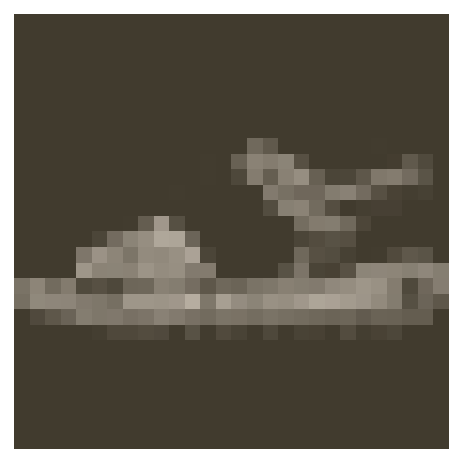

In [53]:
image, label = next(iter(train_loader)) #Pulsar varias veces
utils.show_image(image[0, :])

### La red

Definimos una red usando `OrdereDict`, nombramos cada capa/operación

In [54]:
input_size = 784
hidden_sizes = [512, 256, 128]
output_size = 10

model = nn.Sequential(OrderedDict([
            ('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu_1', nn.ReLU()),
            ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu_2', nn.ReLU()),
            ('fully_connected_3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
            ('relu_3', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[2], output_size)),
        ]))
model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=512, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=512, out_features=256, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=256, out_features=128, bias=True)
  (relu_3): ReLU()
  (logits): Linear(in_features=128, out_features=10, bias=True)
)

### ¡Hora de Entrenar!

Entrenar es bastante sencillo, como ya has visto:

 - Paso 1: Define el criterio (función de pérdida).
 - Paso 2: Define el optimizador (por ejemplo, [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).
 - Paso 3: Para cada lote en cada epoch:
     - Calcula las salidas de la red.
     - Calcula la pérdida o error.
     - Propaga el error hacia atrás.
     - Actualiza los parámetros.

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [56]:
epochs = 10
print_every = 50
steps = 0

for epoch in range(1, epochs + 1):
    running_loss = 0
    for images, labels in iter(train_loader):
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'Epoch: {epoch}/{epochs}...\nLoss: {running_loss/print_every}')
            
            running_loss = 0

Epoch: 1/10...
Loss: 1.0814480608701706
Epoch: 1/10...
Loss: 0.6546878409385681
Epoch: 1/10...
Loss: 0.6212599271535874
Epoch: 1/10...
Loss: 0.533799455165863
Epoch: 1/10...
Loss: 0.5028991770744323
Epoch: 1/10...
Loss: 0.4759166651964188
Epoch: 1/10...
Loss: 0.4972801643610001
Epoch: 1/10...
Loss: 0.505151544213295
Epoch: 1/10...
Loss: 0.464886332154274
Epoch: 1/10...
Loss: 0.4521948507428169
Epoch: 1/10...
Loss: 0.432870622575283
Epoch: 1/10...
Loss: 0.4284727558493614
Epoch: 1/10...
Loss: 0.4526283383369446
Epoch: 1/10...
Loss: 0.40606582701206206
Epoch: 1/10...
Loss: 0.4230638706684113
Epoch: 1/10...
Loss: 0.41561594247817996
Epoch: 1/10...
Loss: 0.44837530940771103
Epoch: 1/10...
Loss: 0.40003584921360014
Epoch: 2/10...
Loss: 0.09678150475025177
Epoch: 2/10...
Loss: 0.37117515116930005
Epoch: 2/10...
Loss: 0.3908652260899544
Epoch: 2/10...
Loss: 0.3729883769154549
Epoch: 2/10...
Loss: 0.384263154566288
Epoch: 2/10...
Loss: 0.37984356582164763
Epoch: 2/10...
Loss: 0.392465351223945

### Resultados

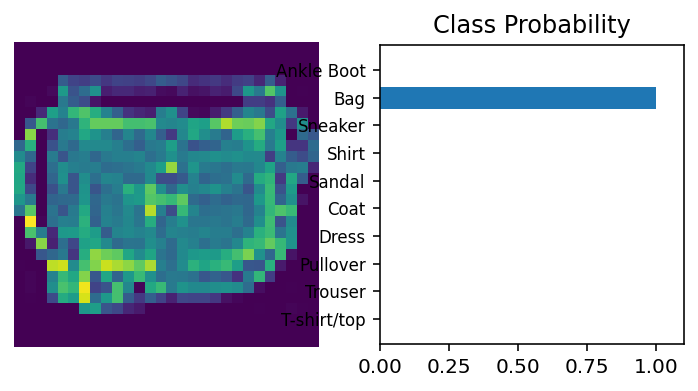

In [57]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

image = images[0]

image = image.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(image)
    
predictions = F.softmax(logits, dim=1)
utils.view_classify(image.view(1, 28, 28), predictions, version='Fashion')

## 5.- Inferencia con PyTorch

Con las técnicas de ML buscamos **inferir** resultados a partir de la base de datos que tenemos.

Sin embargo, existe un problema muy común llamado *overfitting*, que resulta de la eliminación de la capacidad de la red de generalizar los resultados y simplemente memoriza. Por lo anterior, es importante tener mecanismo de validación, compuestos de imágenes nuevas, con el fin de probar el rendimiento del modelo. Para contrarrestar el overfitting hay varias técnicas de regularización, como *dropout*, que analizaremos.

In [58]:
# Como siempre importamos lo necesario
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import utils

In [59]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ])

train_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Vamos a trabajar sobre el problema de Fashion-MNIST. Dejaremos como un parámetro el número de `hidden_layer`. Y regularizaremos usando `dropout`. La proporción de la red que será aleatoriamente apagada es , por defecto 0.5, aunque este valor se puede cambiar.

Puesto que es un problema de clasificación multiclase, debemos activar al salida de la red utilizando un *softmax logarítmico`.

In [60]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_proportion=0.5): #hidden contiene el numero de nodos por capa
        super().__init__()
        
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:]) # 
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        self.dropout = nn.Dropout(p=drop_proportion)
        
    def forward(self, x):
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
            
        x = self.output(x)
        return F.log_softmax(x, dim=1)

### Entrenando a la red

Las salidas han pasado por la función **negative log loss** que es un buen criterio.

Como optimizador usaremos [ADAM](https://pytorch.org/docs/stable/optim.html) que tiene una buena configuración por defecto.

Un aspecto a tener en cuenta es que *dropout* debe ser apagado durante la inferencia, sino la impresión de que la red no ha aprendido nada, ya que aproximadamente la mitad de sus neuronas estarán desactivadas. Hemos de recordar que *dropout* se usa para forzar a la red a usar caminos alternativos para llegar a la misma conclusión, reduciendo así la parcialidad o tendencia de ciertas neuronas a activarse en grupo, pero durante la inferencia no estamos entrenando, sino realmente usando la red, por lo que esta medida no es sólo innecesaria, sino contraproducente.

PyTorch nos deja especificar la modalidad de la red: 

* `model.train()` indica que la red está siendo entrenada y, entre otras cosas, permite que dropout esté activado.
* `model.eval()` significa qeu estamos en modo de inferencia o evaluación, por lo que se apagar el dropout.



In [61]:
model = Network(784, 10, [516, 256], drop_proportion=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [62]:
def validation(model, test_loader, criterion):
    test_loss = 0
    accuracy = 0
    
    for images, labels in test_loader:
        images.resize_(images.shape[0], 784)
        
        output = model.forward(images)
        test_loss += criterion(output, labels).item()
        
        predictions = torch.exp(output)
        equality = (labels.data == predictions.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
        
    return test_loss, accuracy

In [63]:
epochs = 5
print_every = 50
steps = 0
running_loss = 0

for epoch in range(1, epochs + 1):
    model.train()  # Entra en modo entrenamiento
    for images, labels in train_loader:
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            model.eval()  # Entra en modo inferencia
            
            with torch.no_grad():
                test_loss, accuracy = validation(model, test_loader, criterion)
            
            print(f'Epoch: {epoch}/{epochs}...')
            print(f'Training Loss: {running_loss/print_every}')
            print(f'Test Loss: {test_loss/len(test_loader)}')
            print(f'Test Accuracy: {accuracy/len(test_loader)}')
            
            
            running_loss = 0
            model.train() #otra vez en modo entrenamiento

Epoch: 1/5...
Training Loss: 1.2391840350627898
Test Loss: 0.7069117018751278
Test Accuracy: 0.7435310482978821
Epoch: 1/5...
Training Loss: 0.7941022443771363
Test Loss: 0.6255809228131726
Test Accuracy: 0.7736862897872925
Epoch: 1/5...
Training Loss: 0.6909544837474823
Test Loss: 0.6163860263338514
Test Accuracy: 0.769207775592804
Epoch: 1/5...
Training Loss: 0.6352997374534607
Test Loss: 0.5516353371037039
Test Accuracy: 0.7967754602432251
Epoch: 1/5...
Training Loss: 0.6168015158176422
Test Loss: 0.530918019212735
Test Accuracy: 0.8029458522796631
Epoch: 1/5...
Training Loss: 0.5937568777799607
Test Loss: 0.527033528135081
Test Accuracy: 0.8039410710334778
Epoch: 1/5...
Training Loss: 0.560611098408699
Test Loss: 0.5124731120789886
Test Accuracy: 0.812699019908905
Epoch: 1/5...
Training Loss: 0.5728222382068634
Test Loss: 0.5121433007868992
Test Accuracy: 0.8114052414894104
Epoch: 1/5...
Training Loss: 0.5423718410730362
Test Loss: 0.5073476853264365
Test Accuracy: 0.81319665908813

Epoch: 4/5...
Training Loss: 0.4503226602077484
Test Loss: 0.4084832006768816
Test Accuracy: 0.8480294346809387
Epoch: 4/5...
Training Loss: 0.42331373035907743
Test Loss: 0.38846349350775883
Test Accuracy: 0.8594745397567749
Epoch: 5/5...
Training Loss: 0.4229907202720642
Test Loss: 0.39421661815066245
Test Accuracy: 0.8552945852279663
Epoch: 5/5...
Training Loss: 0.4144744238257408
Test Loss: 0.38244290365155337
Test Accuracy: 0.8588773608207703
Epoch: 5/5...
Training Loss: 0.4199689361453056
Test Loss: 0.40253792257065985
Test Accuracy: 0.847332775592804
Epoch: 5/5...
Training Loss: 0.43804052233695984
Test Loss: 0.38401616995881316
Test Accuracy: 0.8600716590881348
Epoch: 5/5...
Training Loss: 0.4237778800725937
Test Loss: 0.3834354269086935
Test Accuracy: 0.8623606562614441
Epoch: 5/5...
Training Loss: 0.4291764745116234
Test Loss: 0.3941841925595217
Test Accuracy: 0.8524084687232971
Epoch: 5/5...
Training Loss: 0.44190257489681245
Test Loss: 0.3839400229370518
Test Accuracy: 0.85

### Inferencia

Con nuestra red entrenada, probemos

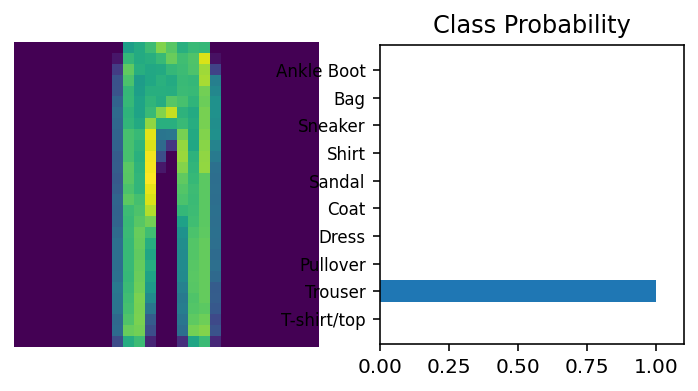

In [64]:
model.eval()

data_iter = iter(test_loader)
images, labels = data_iter.next()
image = images[0]

image = image.view(1, 784)

with torch.no_grad():
    output = model.forward(image)
    
predictions = torch.exp(output)

utils.view_classify(image.view(1, 28, 28), predictions, version='Fashion')